In [21]:
import pandas as pd
from sql_server import pyodbc
import matplotlib.pyplot as plt

ImportError: No module named sql_server

In [13]:
df = pd.read_csv('sampleData.csv', encoding='latin-1')

In [14]:
df.head()

,dateOfSale,price,address,county,not_full_market
0,05/01/2011,"â¬270,000.00","10 CADDELL, THE LINKS, STATION RD, Dublin 13",Dublin,0
1,05/02/2011,"â¬234,000.00","12 LE HUNT HOUSE, BRENNANSTOWN, CABINTEELY VIL...",Cork,0
2,05/03/2011,"â¬165,000.00","129 RIALTO COTTAGES, DUBLIN 8, DUBLIN, Dublin 8",Waterford,0
3,05/04/2011,"â¬157,500.00","23 SUNDALE PARADE, MOUNTAIN VIEW, TALLAGHT DUB...",Limerick,0
4,05/05/2011,"â¬263,000.00","4 KILTIPPER VIEW, KILTIPPER RD, TALLAGHT DUBLI...",Longford,0


## Renaming column

In [15]:
df = df.rename(columns = {'dateOfSale':'date_of_sale'})
df.head()

,date_of_sale,price,address,county,not_full_market
0,05/01/2011,"â¬270,000.00","10 CADDELL, THE LINKS, STATION RD, Dublin 13",Dublin,0
1,05/02/2011,"â¬234,000.00","12 LE HUNT HOUSE, BRENNANSTOWN, CABINTEELY VIL...",Cork,0
2,05/03/2011,"â¬165,000.00","129 RIALTO COTTAGES, DUBLIN 8, DUBLIN, Dublin 8",Waterford,0
3,05/04/2011,"â¬157,500.00","23 SUNDALE PARADE, MOUNTAIN VIEW, TALLAGHT DUB...",Limerick,0
4,05/05/2011,"â¬263,000.00","4 KILTIPPER VIEW, KILTIPPER RD, TALLAGHT DUBLI...",Longford,0


# Parsing dates

In [16]:
df['date_of_sale'] = pd.to_datetime(df['date_of_sale'], format='%d/%m/%Y')
df.head()

,date_of_sale,price,address,county,not_full_market
0,2011-01-05,"â¬270,000.00","10 CADDELL, THE LINKS, STATION RD, Dublin 13",Dublin,0
1,2011-02-05,"â¬234,000.00","12 LE HUNT HOUSE, BRENNANSTOWN, CABINTEELY VIL...",Cork,0
2,2011-03-05,"â¬165,000.00","129 RIALTO COTTAGES, DUBLIN 8, DUBLIN, Dublin 8",Waterford,0
3,2011-04-05,"â¬157,500.00","23 SUNDALE PARADE, MOUNTAIN VIEW, TALLAGHT DUB...",Limerick,0
4,2011-05-05,"â¬263,000.00","4 KILTIPPER VIEW, KILTIPPER RD, TALLAGHT DUBLI...",Longford,0


# Full market values parsing

In [17]:
def findFull(row):
    return row.find('**') != -1
df['not_full_market'] = df['price'].apply(lambda row: findFull(row))

In [18]:
df.head()

,date_of_sale,price,address,county,not_full_market
0,2011-01-05,"â¬270,000.00","10 CADDELL, THE LINKS, STATION RD, Dublin 13",Dublin,False
1,2011-02-05,"â¬234,000.00","12 LE HUNT HOUSE, BRENNANSTOWN, CABINTEELY VIL...",Cork,False
2,2011-03-05,"â¬165,000.00","129 RIALTO COTTAGES, DUBLIN 8, DUBLIN, Dublin 8",Waterford,False
3,2011-04-05,"â¬157,500.00","23 SUNDALE PARADE, MOUNTAIN VIEW, TALLAGHT DUB...",Limerick,False
4,2011-05-05,"â¬263,000.00","4 KILTIPPER VIEW, KILTIPPER RD, TALLAGHT DUBLI...",Longford,False


## Parsing price

In [19]:
def parsePrice(row):
    str_a = row[3:]
    str_a = str_a.replace(' ', '')
    str_a = str_a.replace('**', '')
    str_a = str_a.replace(',','')
    
    return float(str_a)

df['price'] = df['price'].map(lambda row: parsePrice(row))
df.head()

,date_of_sale,price,address,county,not_full_market
0,2011-01-05,270000.0,"10 CADDELL, THE LINKS, STATION RD, Dublin 13",Dublin,False
1,2011-02-05,234000.0,"12 LE HUNT HOUSE, BRENNANSTOWN, CABINTEELY VIL...",Cork,False
2,2011-03-05,165000.0,"129 RIALTO COTTAGES, DUBLIN 8, DUBLIN, Dublin 8",Waterford,False
3,2011-04-05,157500.0,"23 SUNDALE PARADE, MOUNTAIN VIEW, TALLAGHT DUB...",Limerick,False
4,2011-05-05,263000.0,"4 KILTIPPER VIEW, KILTIPPER RD, TALLAGHT DUBLI...",Longford,False


# Inserting to DB

In [1]:
# Database Connection Info
db="C:\Users\User\AppData\Local\Microsoft\Microsoft SQL Server Local DB\Instances\MSSQLLocalDB"

try:
    conn = p.connect(db)
except Exception:
    print"No Connection"

df.to_sql('arealyser_ppr', conn, if_exists='replace', index=True, index_label="id")

No Connection


NameError: name 'df' is not defined

## Data exploring

In [155]:
df.set_index(['date_of_sale'],inplace=True)

In [156]:
df = df.drop('not_full_market', 1)

In [157]:
averages_by_county = df.groupby('county')['price'].mean()

In [161]:
averages_by_county = averages_by_county.sort_values()
averages_by_county.head()

county
Offaly       252000.000000
Donegal      261000.000000
Westmeath    310979.460909
Meath        337692.333333
Galway       341681.783333
Name: price, dtype: float64

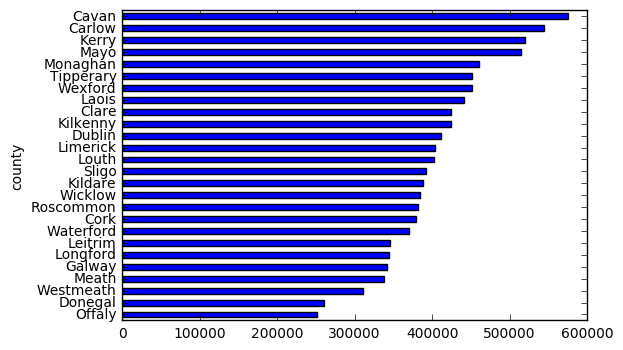

In [162]:
averages_by_county.plot.barh()
plt.show()

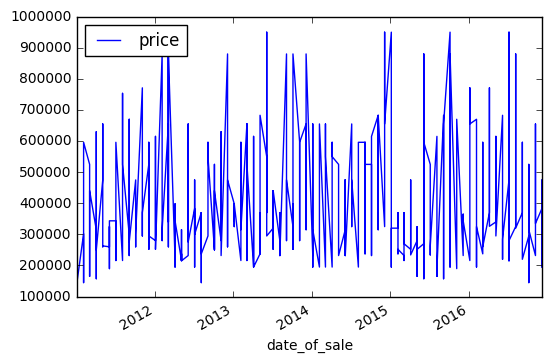

In [160]:
df.plot()
plt.show()